In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ts.experimental import Pso, GeneralizedParetoDistribution, GpdEstimate
from ts.plot import Plot

In [2]:
def rastrigin(x):
    
    A = 10
    n = x.shape[0]
    
    return A * n + np.sum(np.square(x) - A * np.cos(2 * np.pi * x), axis=0)


def ackley(u):
    
    x, y = u[0], u[1]
    
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x * x + y * y))) \
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) \
        + 20

def sphere(x):
    
    return np.sum(np.square(x), axis = 0)

def rosenbrock(x):
    
    return np.sum(
        100 * np.square(x[1:] - np.square(x[:-1]))
        + np.square(1 - x[:-1])
    )

def booth(u):
        
    x, y = u[0], u[1]
    
    return np.square(x + 2 * y - 7) \
        + np.square(2 * x + y - 5)

def himmelblau(u):
    
    x, y = u[0], u[1]
    
    return np.square(x * x + y - 11) + np.square(x + y * y - 7)

Normal PSO
Pos: [-7.66345830e-10 -9.94958636e-01  6.25861719e-10 -5.64938444e-11
 -2.08629273e-09]
Cost: 0.9949590570932898


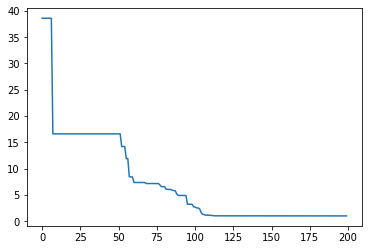

PSO with Constriction Coefficients
Pos: [-9.94400896e-01 -3.47178525e-04 -1.61814381e-04 -3.32841289e-04
  6.18179235e-04]
Cost: 0.9951476394847276


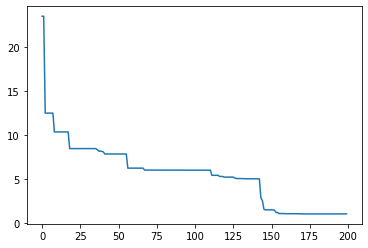

In [3]:
# Rastrigin

dim = 5
num_particles = 50
num_iterations = 200

print('Normal PSO')

initial_pos = Pso.computeInitialPos([(-5.12, 5.12) for i in range(dim)], num_particles)
pos, cost, iterCosts = Pso.pso(rastrigin, initial_pos, numIterations=num_iterations)

print(f'Pos: {pos}')
print(f'Cost: {cost}')

plt.plot(iterCosts)
plt.show()

print('PSO with Constriction Coefficients')

initial_pos = Pso.computeInitialPos([(-5.12, 5.12) for i in range(dim)], num_particles)
pos, cost, iterCosts = Pso.psoConstrictionCoeff(rastrigin, initial_pos, numIterations=num_iterations)

print(f'Pos: {pos}')
print(f'Cost: {cost}')

plt.plot(iterCosts)
plt.show()

Pos: [-1.48672771e-16 -3.23327138e-16]
Cost: -2.7182818284590446


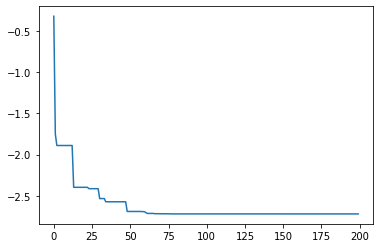

In [4]:
# Ackley

dim = 2
num_particles = 50
num_iterations = 200

initial_pos = Pso.computeInitialPos([(-5., 5.) for i in range(dim)], num_particles)
pos, cost, iterCosts = Pso.pso(ackley, initial_pos, numIterations=num_iterations)

print(f'Pos: {pos}')
print(f'Cost: {cost}')

plt.plot(iterCosts)
plt.show()

Pos: [-1.27359390e-06 -1.29147611e-06 -6.05329683e-08  6.01114342e-07
 -3.80296754e-07  2.77640495e-08  9.75025199e-07 -7.58557598e-09
  3.76674582e-07 -4.86853470e-07]
Cost: 5.1299928459426485e-12


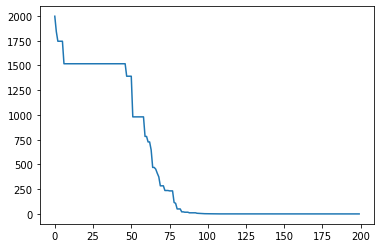

In [5]:
# Sphere

dim = 10
num_particles = 50
num_iterations = 200

initial_pos = Pso.computeInitialPos([(-50, 50) for i in range(dim)], num_particles)
pos, cost, iterCosts = Pso.pso(sphere, initial_pos, numIterations=num_iterations)

print(f'Pos: {pos}')
print(f'Cost: {cost}')

plt.plot(iterCosts)
plt.show()

Pos: [ 0.83391469  0.69348878  0.48175356  0.22763493  0.06216182  0.01196166
  0.0089407   0.00957387  0.01056392 -0.00304395]
Cost: 5.832940673956388


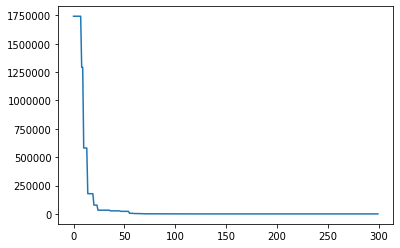

In [6]:
# Rosenbrock

dim = 10
num_particles = 100
num_iterations = 300

initial_pos = Pso.computeInitialPos([(-20, 20) for i in range(dim)], num_particles)
pos, cost, iterCosts = Pso.pso(rosenbrock, initial_pos, numIterations=num_iterations)

print(f'Pos: {pos}')
print(f'Cost: {cost}')

plt.plot(iterCosts)
plt.show()

Pos: [1. 3.]
Cost: 0.0


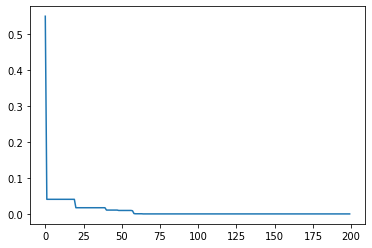

In [7]:
# Booth

dim = 2
num_particles = 50
num_iterations = 200

initial_pos = Pso.computeInitialPos([(-10, 10) for i in range(dim)], num_particles)
pos, cost, iterCosts = Pso.pso(booth, initial_pos, numIterations=num_iterations)

print(f'Pos: {pos}')
print(f'Cost: {cost}')

plt.plot(iterCosts)
plt.show()

Pos: [3. 2.]
Cost: 0.0


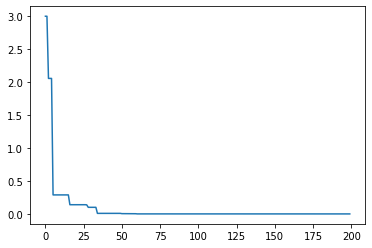

In [8]:
# Himmelblau

dim = 2
num_particles = 50
num_iterations = 200

initial_pos = Pso.computeInitialPos([(-5, 5) for i in range(dim)], num_particles)
pos, cost, iterCosts = Pso.pso(himmelblau, initial_pos, numIterations=num_iterations)

print(f'Pos: {pos}')
print(f'Cost: {cost}')

plt.plot(iterCosts)
plt.show()

# ML Estimation of GPD

## PSO

Shape: 0.5305409506717779, Scale: 4.940994020545264, Max Likelihood: -3127.478236330233


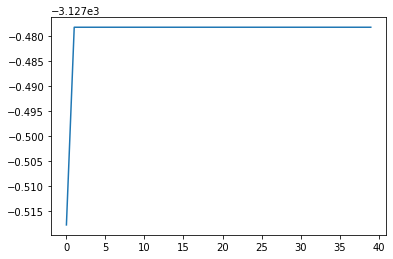

In [2]:
gpd = GeneralizedParetoDistribution(0.5, 5)
n = 1000
data = gpd.sample(n)

init_pos = Pso.computeInitialPos([(0.05, 1), (1, 8)], 40)
params, max_likelihood, likelihood_vals = GpdEstimate.psoMethod(data, init_pos, numIterations=40)
shapeParam, scaleParam = params

print(f'Shape: {shapeParam}, Scale: {scaleParam}, Max Likelihood: {max_likelihood}')
plt.plot(likelihood_vals)

Shape: -4.877659315653836, Scale: 12.194176322523282, Max Likelihood: 1237.4280877031688


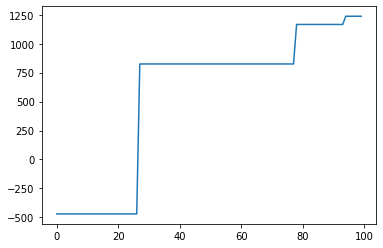

In [3]:
gpd = GeneralizedParetoDistribution(-4, 10)
n = 2000
data = gpd.sample(n)

init_pos = Pso.computeInitialPos([(-7, 7), (1, 40)], 100)
params, max_likelihood, likelihood_vals = GpdEstimate.psoMethod(data, init_pos, numIterations=100)
shapeParam, scaleParam = params

print(f'Shape: {shapeParam}, Scale: {scaleParam}, Max Likelihood: {max_likelihood}')
plt.plot(likelihood_vals)

Shape: -10.380520564161028, Scale: 31.14156169248309, Max Likelihood: 10653.231201424109


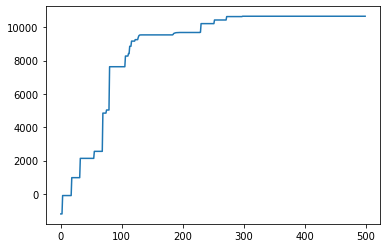

In [4]:
gpd = GeneralizedParetoDistribution(-10, 30)
n = 2000
data = gpd.sample(n)

init_pos = Pso.computeInitialPos([(-50, -1), (1, 50)], 100)
params, max_likelihood, likelihood_vals = GpdEstimate.psoMethod(data, init_pos, numIterations=500)
shapeParam, scaleParam = params

print(f'Shape: {shapeParam}, Scale: {scaleParam}, Max Likelihood: {max_likelihood}')
plt.plot(likelihood_vals)

## Gradient Descent Line Search

Shape: 0.3410632869823773, Scale: 7.389434567750339


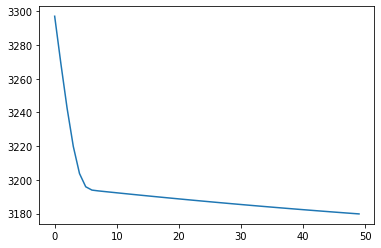

In [5]:
gpd = GeneralizedParetoDistribution(0.5, 5)
n = 1000
data = gpd.sample(n)

shape = np.random.uniform(0.05, 7)
scale = np.random.uniform(2, 10)

params, negLikelihood_vals = GpdEstimate.gradDescentLineSearch(data, shape, scale, numIterations=50)
shapeParam, scaleParam = params[0], params[1]

print(f'Shape: {shapeParam}, Scale: {scaleParam}')
plt.plot(negLikelihood_vals)

Shape: -4.986181880763729, Scale: 12.465454701908849


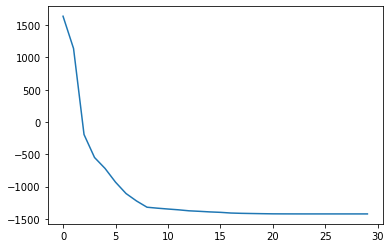

In [6]:
gpd = GeneralizedParetoDistribution(-4, 10)
n = 2000
data = gpd.sample(n)

shape = np.random.uniform(-7, 1)
scale = np.random.uniform(5, 13)

params, negLikelihood_vals = GpdEstimate.gradDescentLineSearch(
    data, 
    shape, scale, 
    1e-3, 0.5,
    numIterations=30
)

shapeParam, scaleParam = params[0], params[1]

print(f'Shape: {shapeParam}, Scale: {scaleParam}')
plt.plot(negLikelihood_vals)

Shape: -8.422657443396435, Scale: 25.26797233018931


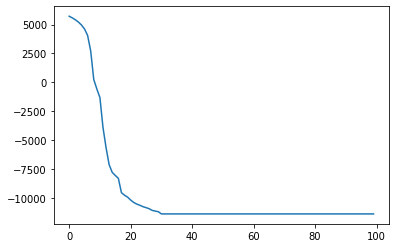

In [15]:
gpd = GeneralizedParetoDistribution(-10, 30)
n = 2000
data = gpd.sample(n)

shape = np.random.uniform(-50, -1)
scale = np.random.uniform(1, 50)

params, negLikelihood_vals = GpdEstimate.gradDescentLineSearch(
    data, 
    shape, scale, 
    1e-3, 0.5,
    numIterations=100
)

shapeParam, scaleParam = params[0], params[1]

print(f'Shape: {shapeParam}, Scale: {scaleParam}')
plt.plot(negLikelihood_vals)

### Comparison

In [8]:
def compare_opt(
    shape_param,
    scale_param,
    num_tries,
    num_data_points_per_trial,
    shape_range,
    scale_range,
    pso_num_particles,
    pso_args,
    grad_descent_args
):
    
    mse_shape_pso = mse_scale_pso = bias_shape_pso = bias_scale_pso = 0
    mse_shape_grad = mse_scale_grad = bias_shape_grad = bias_scale_grad = 0
    
    for _ in range(num_tries):
    
        data = GeneralizedParetoDistribution(shape_param, scale_param)\
            .sample(num_data_points_per_trial)
        
        init_pos = Pso.computeInitialPos([shape_range, scale_range], pso_num_particles)
        
        params_pso, _, _ = GpdEstimate.psoMethod(data, init_pos, **pso_args)
        
        init_shape_param = np.random.uniform(shape_range[0], shape_range[1])
        init_scale_param = np.random.uniform(scale_range[0], scale_range[1])
        
        while GeneralizedParetoDistribution.logLikelihood(
            init_scale_param, init_shape_param, data
        ) is None:
            
            init_shape_param = np.random.uniform(shape_range[0], shape_range[1])
            init_scale_param = np.random.uniform(scale_range[0], scale_range[1])
        
        params_grad, _ = GpdEstimate.gradDescentLineSearch(
            data, 
            init_shape_param, 
            init_scale_param,
            **grad_descent_args
        )
        
        mse_shape_pso += np.square(params_pso[0] - shape_param)
        mse_scale_pso += np.square(params_pso[1] - scale_param)
        bias_shape_pso += shape_param - params_pso[0]
        bias_scale_pso += shape_param - params_pso[1]
        
        
        mse_shape_grad += np.square(params_grad[0] - shape_param)
        mse_scale_grad += np.square(params_grad[1] - scale_param)
        bias_shape_grad += shape_param - params_grad[0]
        bias_scale_grad += shape_param - params_grad[1]
        
    
    mse_shape_pso /= num_tries
    mse_scale_pso /= num_tries
    bias_shape_pso /= num_tries
    bias_scale_pso /= num_tries
    
    
    mse_shape_grad /= num_tries 
    mse_scale_grad /= num_tries
    bias_shape_grad /= num_tries
    bias_scale_grad /= num_tries
    
    Plot.plotTable(
        ['mse shape', 'mse scale', 'bias shape', 'bias scale'],
        headerLoc='top',
        data=np.array([
            [mse_shape_pso, mse_scale_pso, bias_shape_pso, bias_scale_pso],
            [mse_shape_grad, mse_scale_grad, bias_shape_grad, bias_scale_grad]
        ])
    )

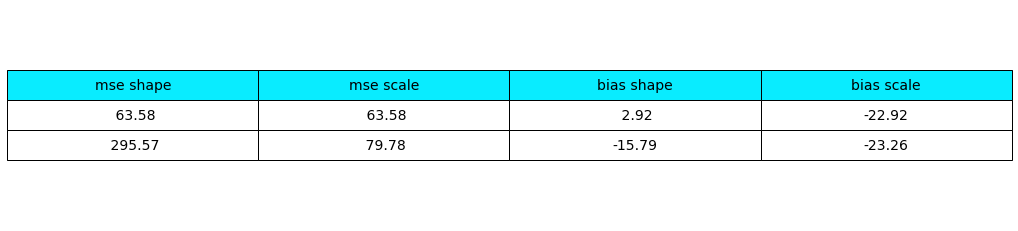

In [17]:
compare_opt(
    -10, 10, 50, 1000, (-20, 20), (1, 30), 100,
    {'numIterations': 100},
    {'numIterations': 100}
)